GARVIKA - 202318061

In [28]:
!pip install pyspark

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from pyspark.sql import SparkSession
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from pyspark.ml.feature import Tokenizer, StopWordsRemover, IDF, HashingTF
from pyspark.ml import Pipeline
import warnings
warnings.filterwarnings('ignore')
# Initializing Spark session
spark = SparkSession.builder.appName("Document clustering").getOrCreate()

# Loading data
data_newsgroup = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = pd.DataFrame({'text': data_newsgroup.data})
data_spark = spark.createDataFrame(data)

# Preprocessing data
tokenizer = Tokenizer(inputCol="text", outputCol="words")
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures")
idf = IDF(inputCol="rawFeatures", outputCol="features")

pipeline = Pipeline(stages=[tokenizer, remover, hashingTF, idf])
model = pipeline.fit(data_spark)
tfidfData = model.transform(data_spark)


24/03/27 19:44:48 WARN TaskSetManager: Stage 320 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.


In [14]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
wcss = []
evaluator = ClusteringEvaluator()

for k in range(2, 11):
    kmeans = KMeans(featuresCol="features", k=k)
    model = kmeans.fit(tfidfData)
    predictions = model.transform(tfidfData)

    # Evaluating clustering
    silhouette = evaluator.evaluate(predictions)
    print(f"Silhouette with squared euclidean distance for k={k}: {silhouette}")

    # Computing WCSS (Within-Cluster Sum of Square)
    wcss.append(model.summary.trainingCost)



24/03/27 19:41:31 WARN TaskSetManager: Stage 99 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:34 WARN TaskSetManager: Stage 102 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:36 WARN TaskSetManager: Stage 103 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:36 WARN TaskSetManager: Stage 104 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:36 WARN TaskSetManager: Stage 105 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:37 WARN TaskSetManager: Stage 106 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:37 WARN TaskSetManager: Stage 107 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.


Silhouette with squared euclidean distance for k=2: 0.9970730982480901


24/03/27 19:41:52 WARN TaskSetManager: Stage 125 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:55 WARN TaskSetManager: Stage 126 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:55 WARN TaskSetManager: Stage 127 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:55 WARN TaskSetManager: Stage 128 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:55 WARN TaskSetManager: Stage 129 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:55 WARN TaskSetManager: Stage 130 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:41:55 WARN TaskSetManager: Stage 131 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.

Silhouette with squared euclidean distance for k=3: 0.9972764389987735


24/03/27 19:42:09 WARN TaskSetManager: Stage 145 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:12 WARN TaskSetManager: Stage 148 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:15 WARN TaskSetManager: Stage 149 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:15 WARN TaskSetManager: Stage 150 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:15 WARN TaskSetManager: Stage 151 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:15 WARN TaskSetManager: Stage 152 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:15 WARN TaskSetManager: Stage 153 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.

Silhouette with squared euclidean distance for k=4: 0.9976469097483889


24/03/27 19:42:31 WARN TaskSetManager: Stage 173 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:34 WARN TaskSetManager: Stage 174 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:34 WARN TaskSetManager: Stage 175 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:34 WARN TaskSetManager: Stage 176 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:35 WARN TaskSetManager: Stage 177 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:35 WARN TaskSetManager: Stage 178 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:35 WARN TaskSetManager: Stage 179 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.

Silhouette with squared euclidean distance for k=5: 0.9922975688539454


24/03/27 19:42:51 WARN TaskSetManager: Stage 198 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:53 WARN TaskSetManager: Stage 199 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:53 WARN TaskSetManager: Stage 200 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:53 WARN TaskSetManager: Stage 201 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:54 WARN TaskSetManager: Stage 202 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:54 WARN TaskSetManager: Stage 203 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:42:54 WARN TaskSetManager: Stage 204 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.

Silhouette with squared euclidean distance for k=6: 0.9882728995075948


24/03/27 19:43:10 WARN TaskSetManager: Stage 223 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:13 WARN TaskSetManager: Stage 224 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:13 WARN TaskSetManager: Stage 225 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:13 WARN TaskSetManager: Stage 226 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:14 WARN TaskSetManager: Stage 227 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:14 WARN TaskSetManager: Stage 228 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:14 WARN TaskSetManager: Stage 229 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.

Silhouette with squared euclidean distance for k=7: 0.9883337063966684


24/03/27 19:43:31 WARN TaskSetManager: Stage 248 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:34 WARN TaskSetManager: Stage 249 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:34 WARN TaskSetManager: Stage 250 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:34 WARN TaskSetManager: Stage 251 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:34 WARN TaskSetManager: Stage 252 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:34 WARN TaskSetManager: Stage 253 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:34 WARN TaskSetManager: Stage 254 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.

Silhouette with squared euclidean distance for k=8: 0.9908665886878493


24/03/27 19:43:51 WARN TaskSetManager: Stage 273 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:54 WARN TaskSetManager: Stage 274 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:54 WARN TaskSetManager: Stage 275 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:54 WARN TaskSetManager: Stage 276 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:54 WARN TaskSetManager: Stage 277 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:54 WARN TaskSetManager: Stage 278 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:43:54 WARN TaskSetManager: Stage 279 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.

Silhouette with squared euclidean distance for k=9: 0.9883644814675787


24/03/27 19:44:12 WARN TaskSetManager: Stage 298 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:44:15 WARN TaskSetManager: Stage 299 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:44:15 WARN TaskSetManager: Stage 300 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:44:15 WARN TaskSetManager: Stage 301 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:44:15 WARN TaskSetManager: Stage 302 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:44:16 WARN TaskSetManager: Stage 303 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:44:16 WARN TaskSetManager: Stage 304 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.

Silhouette with squared euclidean distance for k=10: 0.9269045023876279


In [21]:
print('K','  ','WCSS Score')
j=1
for i in wcss:
  j+=1
  print(f"K:{j}", i)

K    WCSS Score
K:2 403494241.7262372
K:3 350439251.3543506
K:4 277980602.24014306
K:5 274791652.21330947
K:6 259922439.47305974
K:7 256733484.3460937
K:8 255580016.47008595
K:9 233460302.91516975
K:10 233127353.95915562


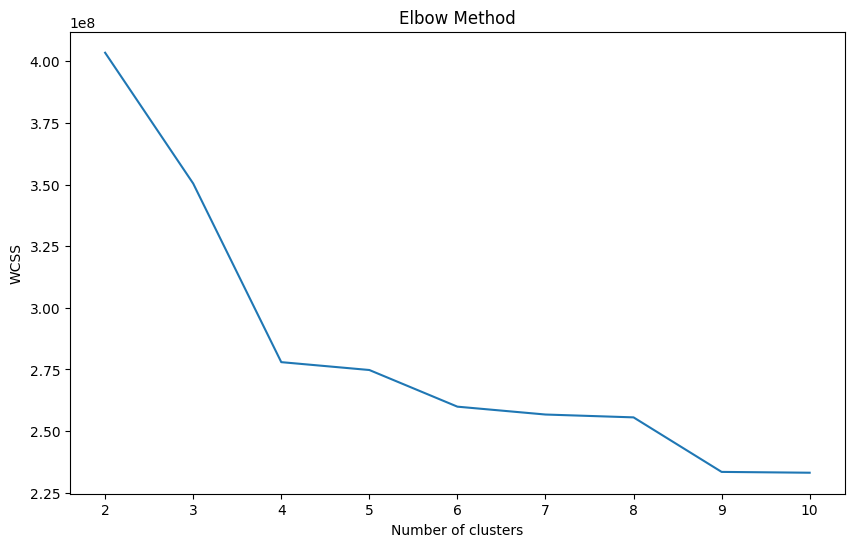

In [22]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

24/03/27 19:48:09 WARN TaskSetManager: Stage 322 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:48:09 WARN TaskSetManager: Stage 325 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:48:15 WARN TaskSetManager: Stage 326 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.


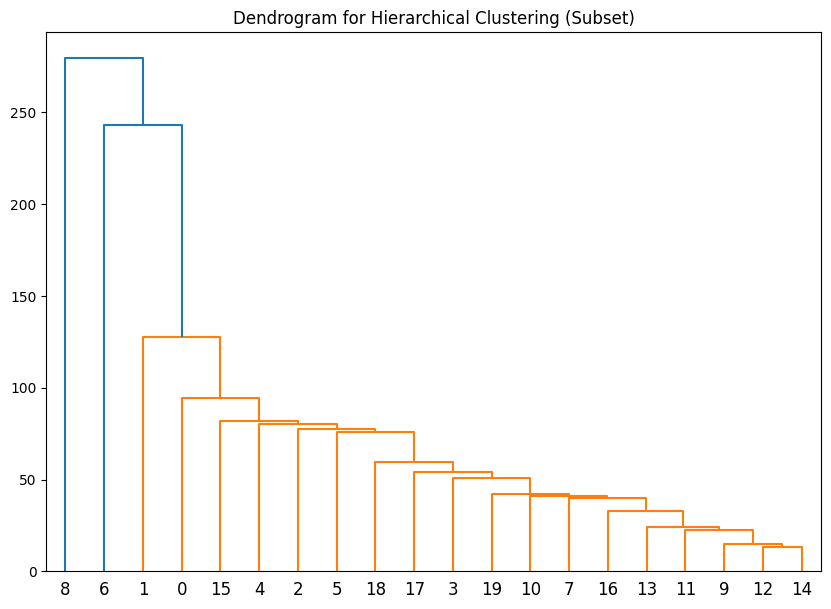

Optimal number of clusters (K): 20


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

subset_size = 20

subset_indices = np.random.choice(tfidfData.count(), size=subset_size, replace=False)

# subset of features from tfidfData based on the sampled indices
subset_features = tfidfData.select('features').rdd.zipWithIndex().filter(lambda x: x[1] in subset_indices).map(lambda x: x[0]).collect()

# ubset features from SparseVector to dense array
subset_array = [row['features'].toArray() for row in subset_features]

# hierarchical clustering on the subset array
Z = linkage(subset_array, method='ward')

# Plot of the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering (Subset)")
dendrogram(Z)
plt.show()

distance_threshold = 7.5
clusters = fcluster(Z, distance_threshold, criterion='distance')
optimal_k = len(np.unique(clusters))

print("Optimal number of clusters (K):", optimal_k)


In [27]:
from pyspark.ml.feature import Tokenizer, Word2Vec
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml import Pipeline

tokenizer = Tokenizer(inputCol="text", outputCol="tokenized_words")

word2Vec = Word2Vec(vectorSize=100, minCount=0, inputCol="tokenized_words", outputCol="word2VecFeatures")

# Pipeline: Tokenization -> Word2Vec transformation
pipeline = Pipeline(stages=[tokenizer, word2Vec])

model = pipeline.fit(data_spark)

# Transform documents into vectors
word2VecData = model.transform(data_spark)

# KMeans clustering
kmeans = KMeans().setK(5).setSeed(1)
kmeansModel = kmeans.fit(word2VecData)

# predictions
predictions = kmeansModel.transform(word2VecData)

# clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette}")


24/03/27 19:55:59 WARN TaskSetManager: Stage 327 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:56:08 WARN TaskSetManager: Stage 329 contains a task of very large size (4668 KiB). The maximum recommended task size is 1000 KiB.
24/03/27 19:59:24 ERROR Executor: Exception in task 0.0 in stage 331.0 (TID 1041)
java.lang.OutOfMemoryError: Java heap space
	at java.base/java.nio.HeapByteBuffer.<init>(HeapByteBuffer.java:61)
	at java.base/java.nio.ByteBuffer.allocate(ByteBuffer.java:348)
	at org.apache.spark.serializer.SerializerHelper$.$anonfun$serializeToChunkedBuffer$1(SerializerHelper.scala:40)
	at org.apache.spark.serializer.SerializerHelper$.$anonfun$serializeToChunkedBuffer$1$adapted(SerializerHelper.scala:40)
	at org.apache.spark.serializer.SerializerHelper$$$Lambda$2801/0x00000008413dd840.apply(Unknown Source)
	at org.apache.spark.util.io.ChunkedByteBufferOutputStream.allocateNewChunkIfNeeded(ChunkedByteBufferOutputStream.sca

ConnectionRefusedError: [Errno 111] Connection refused